# Part II - Investigation of Death Distribution and Case Fatality Rate in the 2014–2016 Ebola Virus Disease Outbreak

## by Uchanma Adeola Igbokwe


## Investigation Overview

The main goal of this exploration was to understand the distribution of confirmed deaths throughout the duration of the epidemic. It was also important to see how the confirmed cases influenced the total number of deaths.
A second was to determine whether there is a relationship between total probable cases and total confirmed cases. 
And another was to determine the case fatality rate of each country for the duration of the outbreak.


## Dataset Overview

The data explored had 17585 entries and 36 indicators. Because most of the indicators had over 60% missing information, 9 features were chosen for the analysis. The dataset was tidied by making the indicators columns and the observation rows, which resulted in 2485 entries. In addition, a categorical column was created for the classification of Ebola deaths in the country according to 'low', 'high' and 'very high'.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
ebola_df = pd.read_csv('ebola_data_clean.csv')

## Distribution of Total Confirmed Ebola Deaths

Generally, the numbers of confirmed Ebola deaths were between 0-200. Therefore, for most days of the outbreak, the number of deaths typically ranged between 0-200. Slight peaks are seen in 2000-2200 and at 3400-3600 bars with the 3400-3600 bar being the next bar where more values fall into after the 0-200 bar. About four values fall into the highest value 3800.

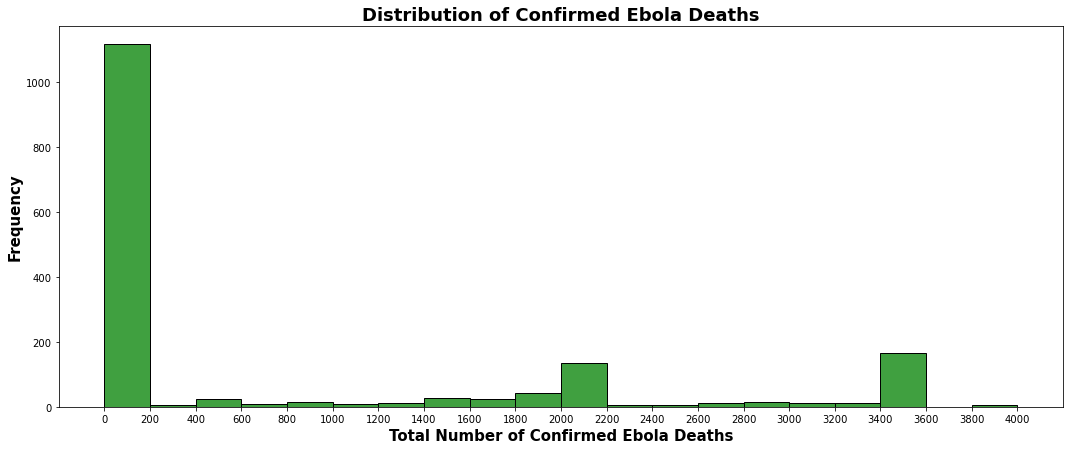

In [3]:
plt.figure(figsize =(18, 7))
bins = np.arange(0, ebola_df['total_confirmed_deaths'].max()+200, 200)
sb.histplot(data= ebola_df, x='total_confirmed_deaths', color = 'green', bins= bins);
plt.xticks(bins);

#Formats x and y-axis
plt.xlabel( 'Total Number of Confirmed Ebola Deaths', fontsize=15, weight = "bold")

plt.ylabel('Frequency', fontsize=15, weight = "bold");
    
#Adds title to the top of histogram
plt.title('Distribution of Confirmed Ebola Deaths', fontsize=18, weight="bold");

## Distribution of Case Fatality Rate

The histogram of case fatality rate is right tailed and has two high peaks, one between 0-10 and the second at 30-40. The other bars contain a substantial number of values except from 70 and above. This distribution is bimodal. Since case fatality rate is a measureof disease severity, the lower values are preferred. This distribution represents the bins where the case fatality rate calculated daily fall into.

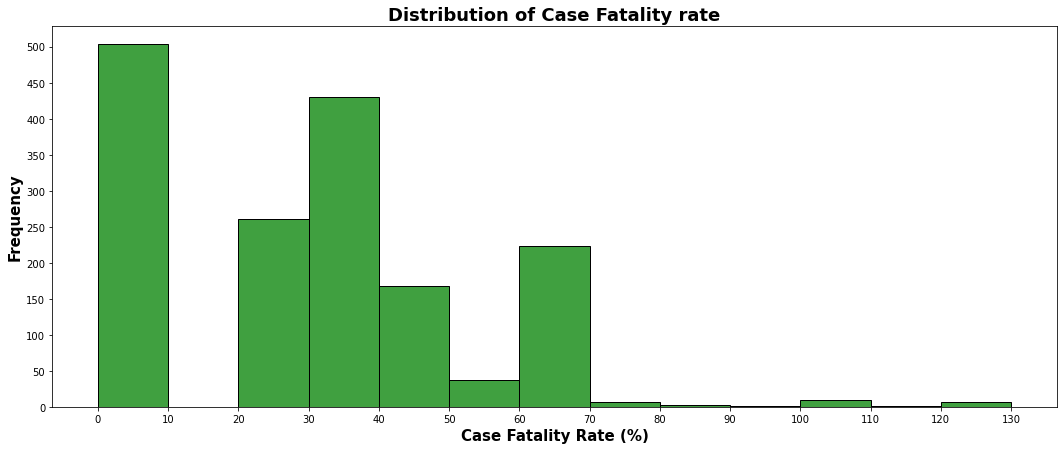

In [4]:
plt.figure(figsize =(18, 7))
bins = np.arange(0, ebola_df["case_fatality_rate"].max() + 10, 10)
sb.histplot(data= ebola_df, x='case_fatality_rate', color = 'green', bins= bins);
plt.xticks(bins);
plt.yticks(np.arange(0, 500 + 50, 50));

#Formats x and y-axis
plt.xlabel( 'Case Fatality Rate (%)', fontsize=15, weight = "bold")

plt.ylabel('Frequency', fontsize=15, weight = "bold");
    
#Adds title to the top of histogram
plt.title('Distribution of Case Fatality rate', fontsize=18, weight="bold");

## Trends in the number of confirmed deaths and confirmed cases in the 2-year Ebola Outbreak

To enable us see the trend in both confirmed deaths and cases, the data was plotted on a line chart. This shows there is a gradual rise in both the number of confirmed cases and confirmed deaths. For the number of confirmed cases, a slight drop is observed in October 2014 before increasing again. This is mostly the case, a sustained rise, dip then a rise again until April 2015 where a sustained decrease was noticed.

Number of confirmed deaths also showed a similar pattern with the number of confirmed cases. This is expected since they have very strong positive correlation.


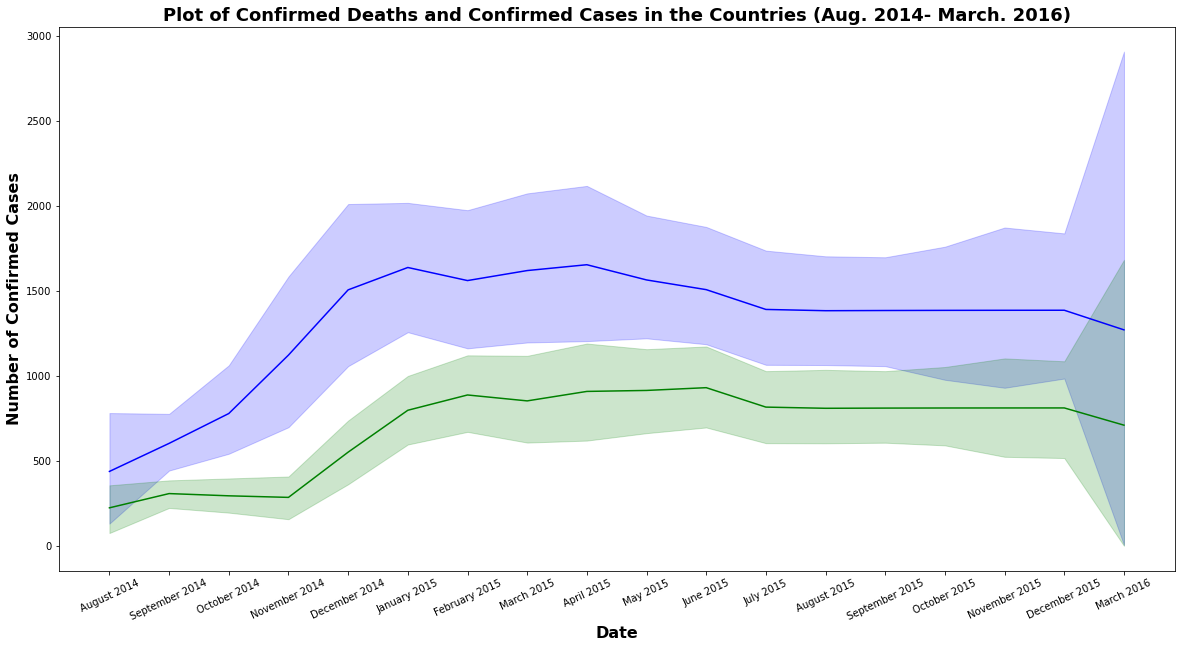

In [5]:
# What is the spread of the number of confirmed deaths and confirmed cases in the 2-year outbreak?
plt.figure(figsize= (20,10))

sb.lineplot(data = ebola_df, x= 'monthyear', y= 'total_confirmed_cases', color = 'blue');
sb.lineplot(data= ebola_df, x= 'monthyear', y= 'total_confirmed_deaths', color= 'green');
plt.xticks(rotation = 25);

#Setting labels/titles for axis
plt.xlabel('Date', fontsize = 16, weight = "bold")
plt.ylabel('Number of Confirmed Cases', fontsize = 16, weight = "bold")

#Adding title of chart and legend for rating values
plt.title('Plot of Confirmed Deaths and Confirmed Cases in the Countries (Aug. 2014- March. 2016)', fontsize=18, weight = "bold");

## Cumulative confirmed deaths in each country

Sierra Leone, Guinea and Liberia have the highest cumulative confirmed deaths for the duration of the outbreak. The United Kingdom, Spain, Senegal, and Italy have no record of deaths.


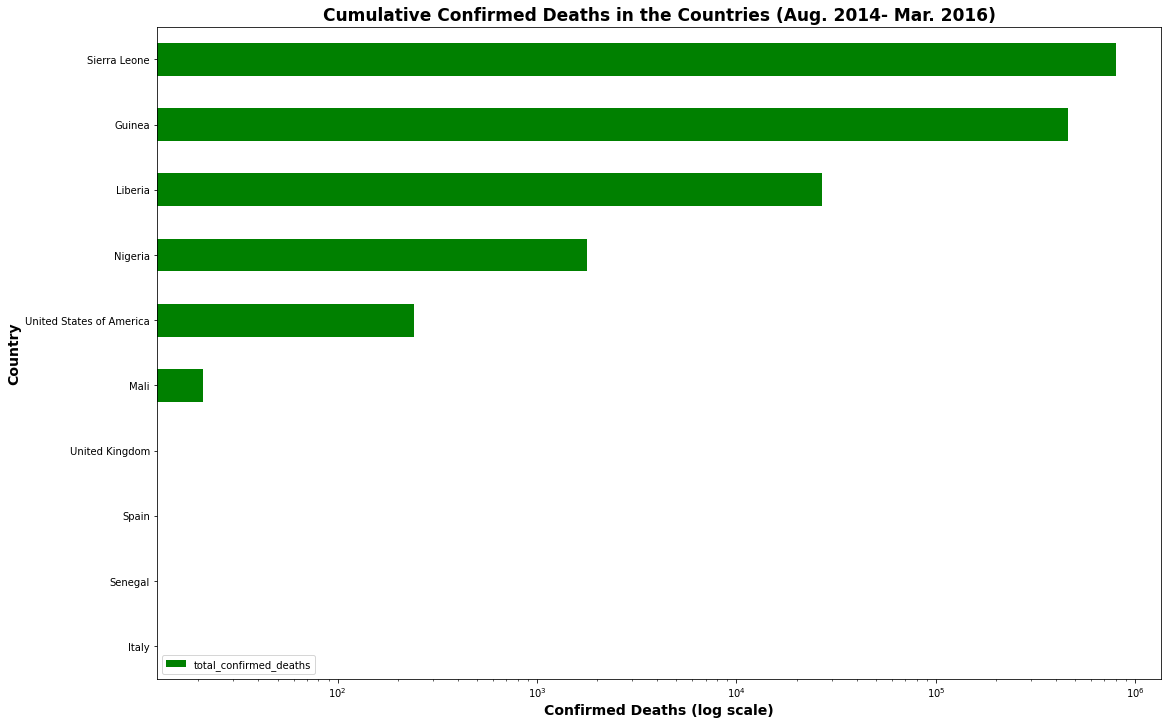

In [6]:
# Distribution of deaths in the various countries, ordered from highest to lowest.
grouped = ebola_df[['total_confirmed_deaths', 'country', 'date']].groupby('country').sum()
grouped = grouped.sort_values(by = ['total_confirmed_deaths'], ascending = True)

grouped.plot.barh(color = 'green', figsize = [18,12]);
plt.xscale('log')

# Add x label and format it
plt.xlabel('Confirmed Deaths (log scale)', fontsize = 14, weight = "bold")

# Add y label and format it
plt.ylabel('Country', fontsize = 14, weight = "bold")

# Add title and format it
plt.title('Cumulative Confirmed Deaths in the Countries (Aug. 2014- Mar. 2016)', fontsize =17, weight = "bold");

## Case fatality rate for each country for the outbreak period

The Case fatality rate is a measure of disease severity. The severity of the epidemic was the highest in Guinea compared to the other countries. Even though Sierra Leone had the greatest number of confirmed deaths and cases, it's case fatality rate was not as high as in Guinea. One would expect Liberia to have the third highest case fatality rate but this is not case. Nigeria has the third highest case fatality rate. 

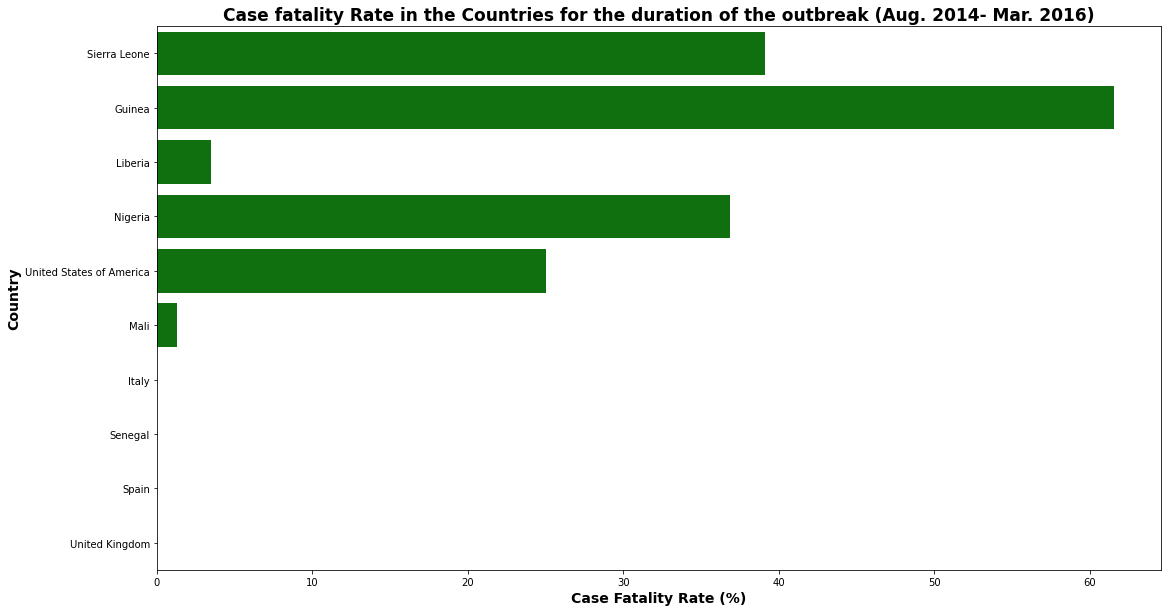

In [7]:
# Cumulative death in each country for the 2 year duration of the outbreak.
# Calculate case fatality rate in each country for the duration of the epidemic.
ebola_tablesum = ebola_df[['country', 'total_confirmed_deaths', 'total_confirmed_cases']].groupby('country', as_index = False).sum().sort_values('total_confirmed_deaths', ascending = False)
ebola_tablesum['case_fatality_overall'] = (ebola_tablesum['total_confirmed_deaths'] / ebola_tablesum['total_confirmed_cases']) * 100

# What is the Case fatality rate in each country for the duration of the outbreak?
# Plot chart
plt.figure(figsize = (18, 10))
sb.barplot(data = ebola_tablesum, y= 'country', x= 'case_fatality_overall', color = 'green')

# Add x label and format it
plt.xlabel('Case Fatality Rate (%)', fontsize = 14, weight = "bold")

# Add y label and format it
plt.ylabel('Country', fontsize = 14, weight = "bold")

# Add title and format it
plt.title('Case fatality Rate in the Countries for the duration of the outbreak (Aug. 2014- Mar. 2016)', fontsize =17, weight = "bold");

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template_Ebola_data.ipynb --to slides --post serve --no-input --no-prompt